# Performance 
Execution times for the multi armed bandit algorithms & memory allocation for the dataset

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from  torch import linalg as LA
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from bandits import LinUCB, Egreedy, NeuralUCB
from evaluator import evaluate
import dataset
from matplotlib import pyplot as plt
import torch



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          16002        9067        2809         702        4125        5895
Swap:          2047        2001          46


In [9]:
%%time
import dataset
files = ("dataset/R6/ydata-fp-td-clicks-v1_0.20090503")
dataset.get_yahoo_events(files)

1001 events with 19 articles
CPU times: user 14.9 ms, sys: 195 µs, total: 15.1 ms
Wall time: 14.5 ms


In [10]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          16002        9076        2799         703        4126        5885
Swap:          2047        2001          46


In [11]:

seed = 46
np.random.seed(seed)
torch.manual_seed(seed)
size = 100
numExp = 1
all_regret = np.zeros((numExp, 3, 1000))
for i in range(numExp):
    tests = [Egreedy(0.05),LinUCB(0.3),NeuralUCB(0.5)]
    for idx, test in enumerate(tests):
        _,_ = evaluate(test, size=size, learn_ratio=1.0)
        all_regret[i, idx] = test.cum_regret

all_regret = all_regret.mean(axis=0)


Egreedy (ε=0.1)     0.3776    0.0s
<ipython-input-11-b9c849b6adba>:11: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  all_regret[i, idx] = test.cum_regret
LinUCB (α=0.3)      0.6656    0.4s
NeuralUCB (α=0.5)   1.0201    1.2m
(3, 1000)


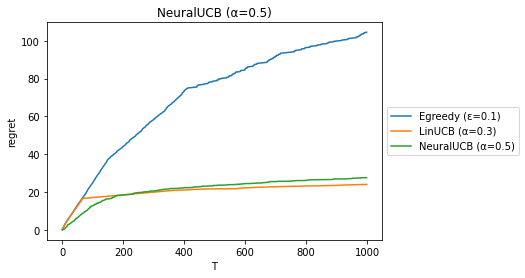

In [12]:
tests = [Egreedy(0.05),LinUCB(0.3),NeuralUCB(0.5)]
alg_names = [x.algorithm for x in tests]
for idx, regret in enumerate(all_regret):
    plt.plot(range(len(regret)), np.cumsum(regret), label=alg_names[idx])
  
plt.title(test.algorithm)
plt.xlabel("T")
plt.ylabel("regret")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [13]:

seed = 46
np.random.seed(seed)
torch.manual_seed(seed)
size = 100
numExp = 1
all_regret = np.zeros((numExp, 3, 1000))
for i in range(numExp):
    tests = [Egreedy(0.05, nonLinear=True),LinUCB(0.3, nonLinear=True),NeuralUCB(0.5, nonLinear=True)]
    for idx, test in enumerate(tests):
        _,_ = evaluate(test, size=size, learn_ratio=1.0)
        all_regret[i, idx] = test.cum_regret

all_regret = all_regret.mean(axis=0)

Egreedy (ε=0.1)     0.4695    0.0s
<ipython-input-13-ae0be956867d>:11: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  all_regret[i, idx] = test.cum_regret
LinUCB (α=0.3)      1.3031    0.4s
NeuralUCB (α=0.5)   3.1743    1.2m
(3, 1000)


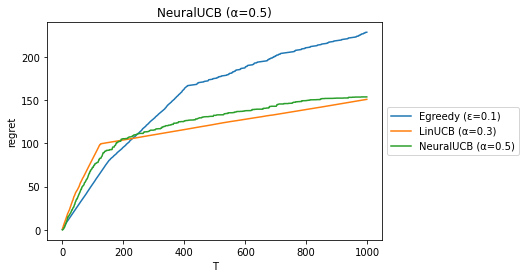

In [14]:

tests = [Egreedy(0.05, nonLinear=True),LinUCB(0.3, nonLinear=True),NeuralUCB(0.5, nonLinear=True)]
alg_names = [x.algorithm for x in tests]
for idx, regret in enumerate(all_regret):
    plt.plot(range(len(regret)), np.cumsum(regret), label=alg_names[idx])
  
plt.title(test.algorithm)
plt.xlabel("T")
plt.ylabel("regret")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()